In [1]:
## General imports

import numpy as np
import torch
import torch.nn as nn

In [2]:
## Notebook config
use_saved_model_if_exists = True
save_trained_model = True
model_saving_path = "./models/dense_autoencoder.pt"

In [3]:
# Use GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
is_device_cuda = device=="cuda"
print(f"Device is {device}")

Device is cuda


In [4]:
from data_loading import get_MNIST_train_validation_test_dataloaders

train_dataloader, _, test_dataloader = get_MNIST_train_validation_test_dataloaders(
    batch_size_train=64,
    batch_size_test=1,
    train_split=0.0, # Don't use a validation set
    use_cuda=is_device_cuda,
)

In [5]:
## Model training
import os
from autoencoder import get_dense_mnist_autoencoder
from training import train_autoencoder

model = get_dense_mnist_autoencoder().to(device)
if use_saved_model_if_exists and os.path.exists(model_saving_path):
    model.load_state_dict(torch.load(model_saving_path))
else:
    train_autoencoder(
        model=model,
        optimizer=torch.optim.Adam(model.parameters(), lr=1e-3),
        criterion=nn.MSELoss(),
        dataloader=train_dataloader,
        epochs=40,
        device=device,
    )

    if save_trained_model:
        torch.save(model.state_dict(), model_saving_path)


  2%|▎         | 1/40 [00:02<01:24,  2.16s/it]

--- Iteration 1: training loss = 0.0429 ---


  5%|▌         | 2/40 [00:04<01:20,  2.12s/it]

--- Iteration 2: training loss = 0.0245 ---


  8%|▊         | 3/40 [00:06<01:19,  2.15s/it]

--- Iteration 3: training loss = 0.0202 ---


 10%|█         | 4/40 [00:08<01:17,  2.16s/it]

--- Iteration 4: training loss = 0.0178 ---


 12%|█▎        | 5/40 [00:10<01:15,  2.15s/it]

--- Iteration 5: training loss = 0.0156 ---


 15%|█▌        | 6/40 [00:12<01:12,  2.13s/it]

--- Iteration 6: training loss = 0.0138 ---


 18%|█▊        | 7/40 [00:14<01:09,  2.11s/it]

--- Iteration 7: training loss = 0.0127 ---


 20%|██        | 8/40 [00:17<01:07,  2.12s/it]

--- Iteration 8: training loss = 0.0120 ---


 22%|██▎       | 9/40 [00:19<01:06,  2.14s/it]

--- Iteration 9: training loss = 0.0113 ---


 25%|██▌       | 10/40 [00:21<01:04,  2.16s/it]

--- Iteration 10: training loss = 0.0107 ---


 28%|██▊       | 11/40 [00:23<01:01,  2.14s/it]

--- Iteration 11: training loss = 0.0102 ---


 30%|███       | 12/40 [00:25<00:59,  2.13s/it]

--- Iteration 12: training loss = 0.0099 ---


 32%|███▎      | 13/40 [00:27<00:57,  2.12s/it]

--- Iteration 13: training loss = 0.0096 ---


 35%|███▌      | 14/40 [00:29<00:55,  2.12s/it]

--- Iteration 14: training loss = 0.0093 ---


 38%|███▊      | 15/40 [00:31<00:53,  2.12s/it]

--- Iteration 15: training loss = 0.0091 ---


 40%|████      | 16/40 [00:34<00:50,  2.12s/it]

--- Iteration 16: training loss = 0.0088 ---


 42%|████▎     | 17/40 [00:36<00:49,  2.13s/it]

--- Iteration 17: training loss = 0.0086 ---


 45%|████▌     | 18/40 [00:38<00:46,  2.13s/it]

--- Iteration 18: training loss = 0.0084 ---


 48%|████▊     | 19/40 [00:40<00:45,  2.15s/it]

--- Iteration 19: training loss = 0.0082 ---


 50%|█████     | 20/40 [00:42<00:42,  2.15s/it]

--- Iteration 20: training loss = 0.0080 ---


 52%|█████▎    | 21/40 [00:44<00:40,  2.14s/it]

--- Iteration 21: training loss = 0.0079 ---


 55%|█████▌    | 22/40 [00:46<00:38,  2.12s/it]

--- Iteration 22: training loss = 0.0077 ---


 57%|█████▊    | 23/40 [00:49<00:36,  2.13s/it]

--- Iteration 23: training loss = 0.0076 ---


 60%|██████    | 24/40 [00:51<00:33,  2.10s/it]

--- Iteration 24: training loss = 0.0075 ---


 62%|██████▎   | 25/40 [00:53<00:31,  2.11s/it]

--- Iteration 25: training loss = 0.0074 ---


 65%|██████▌   | 26/40 [00:55<00:29,  2.10s/it]

--- Iteration 26: training loss = 0.0073 ---


 68%|██████▊   | 27/40 [00:57<00:27,  2.10s/it]

--- Iteration 27: training loss = 0.0072 ---


 70%|███████   | 28/40 [00:59<00:25,  2.11s/it]

--- Iteration 28: training loss = 0.0071 ---


 72%|███████▎  | 29/40 [01:01<00:23,  2.11s/it]

--- Iteration 29: training loss = 0.0070 ---


 75%|███████▌  | 30/40 [01:03<00:21,  2.11s/it]

--- Iteration 30: training loss = 0.0070 ---


 78%|███████▊  | 31/40 [01:05<00:18,  2.09s/it]

--- Iteration 31: training loss = 0.0069 ---


 80%|████████  | 32/40 [01:07<00:16,  2.09s/it]

--- Iteration 32: training loss = 0.0068 ---


 82%|████████▎ | 33/40 [01:09<00:14,  2.08s/it]

--- Iteration 33: training loss = 0.0068 ---


 85%|████████▌ | 34/40 [01:12<00:12,  2.08s/it]

--- Iteration 34: training loss = 0.0067 ---


 88%|████████▊ | 35/40 [01:14<00:10,  2.07s/it]

--- Iteration 35: training loss = 0.0066 ---


 90%|█████████ | 36/40 [01:16<00:08,  2.07s/it]

--- Iteration 36: training loss = 0.0066 ---


 92%|█████████▎| 37/40 [01:18<00:06,  2.08s/it]

--- Iteration 37: training loss = 0.0066 ---


 95%|█████████▌| 38/40 [01:20<00:04,  2.08s/it]

--- Iteration 38: training loss = 0.0065 ---


 98%|█████████▊| 39/40 [01:22<00:02,  2.11s/it]

--- Iteration 39: training loss = 0.0065 ---


100%|██████████| 40/40 [01:24<00:00,  2.11s/it]

--- Iteration 40: training loss = 0.0064 ---


MSE is 0.007331401575356722


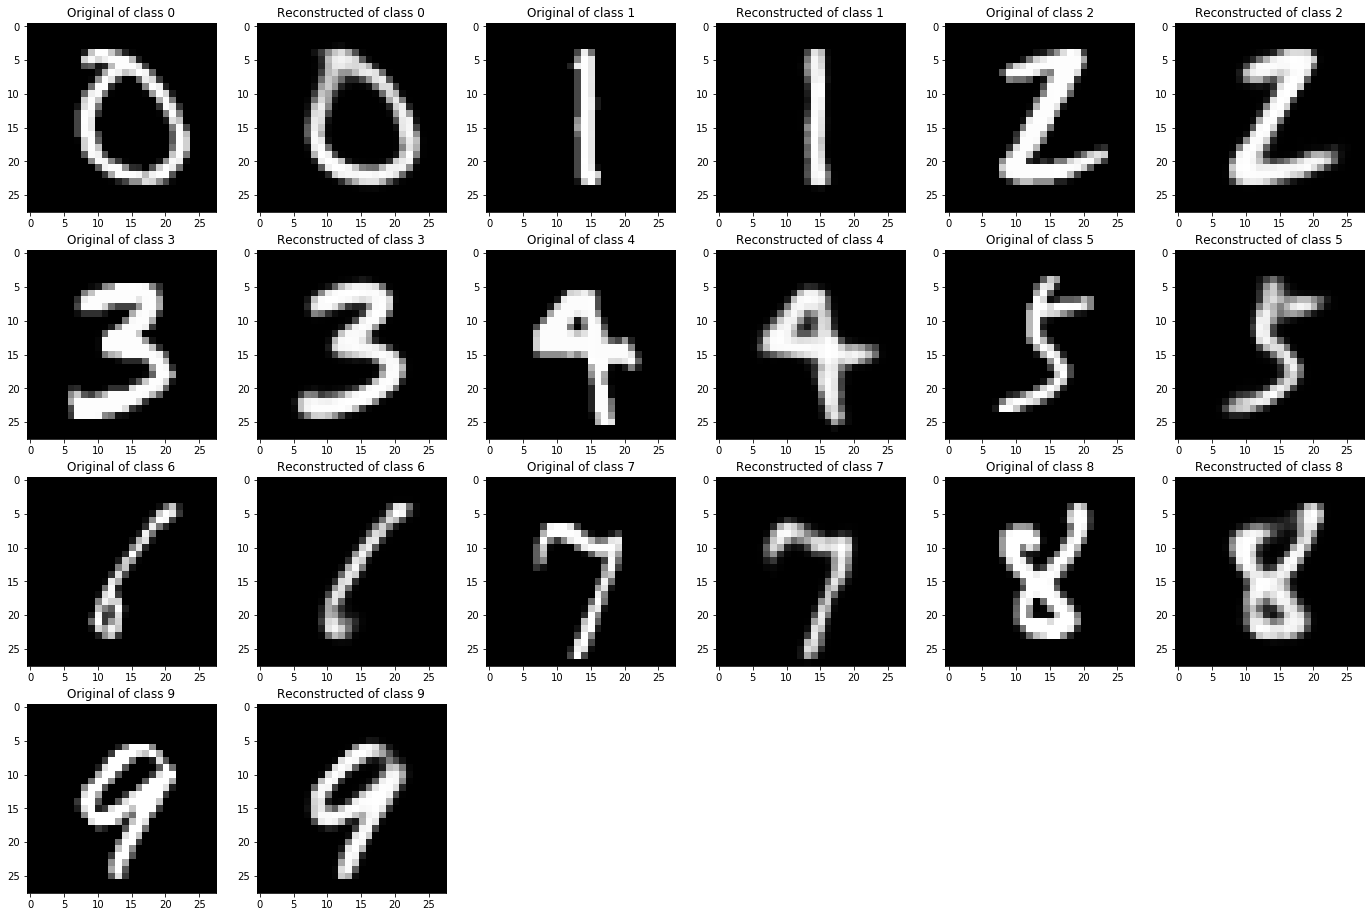

In [6]:
## Model evaluation
from evaluation import get_autoencoder_original_reconstructed_pairs, plot_original_reconstructed_per_class_grayscale

originals, reconstructed, labels = get_autoencoder_original_reconstructed_pairs(model, test_dataloader, device)

mse = np.mean(np.square(originals - reconstructed))
print(f"MSE is {mse}")

plot_original_reconstructed_per_class_grayscale(
    originals, reconstructed, torch.Tensor(labels), subplot_shape=(4,6), figsize=(24,16)
)